In [6]:
import pandas as pd
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [8]:
# loading up the data to dataframe
car_df=pd.read_csv('CarPrice_Assignment.csv')

In [9]:
#original df
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# No. of rows and columns
print('This dataset has ' + str(car_df.shape[0]) + ' rows, and ' + str(car_df.shape[1]) + ' columns')


This dataset has 205 rows, and 26 columns


In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
# NULL VALUE CHECK cpnclusion 
#no null values present in the dataframe so will skip null value treatment

In [12]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# Creating a new data frame from car_df , further modification will now be done on the new dataframe i.e new_car_df

In [13]:
new_car_df = pd.DataFrame(car_df)


In [14]:
# checking up the data
new_car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
print('This new dataset has also ' + str(new_car_df.shape[0]) + ' rows, and ' + str(new_car_df.shape[1]) + ' columns')



This new dataset has also 205 rows, and 26 columns


In [16]:
new_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [17]:
new_car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
# derived metric
# splitting off car company name from carName column
new_car_df['carCompany'] = new_car_df['CarName'].str.split().str[0].str.strip()
new_car_df['carCompany'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: carCompany, dtype: object

In [19]:
# dropping carName column
new_car_df=new_car_df.drop(columns=['CarName'])
#car_df.head()

In [20]:
# converting doornumber value from string to integer
# two - 2 && four - 4
new_car_df['doornumber'] = new_car_df['doornumber'].replace({'two':2,'four':4})


In [21]:
# using label encode to encode value from 2 & 4 to 0 & 1
new_car_df['doornumber']= label_encoder.fit_transform(new_car_df['doornumber']) 
new_car_df['doornumber'].unique()


array([0, 1], dtype=int64)

In [22]:
# observing value counts
# Two Doors - 1 & Four Doors - 0
new_car_df.doornumber.value_counts()


1    115
0     90
Name: doornumber, dtype: int64

In [23]:
new_car_df['drivewheel'] = new_car_df['drivewheel'].astype(str)

In [24]:
#replacing wrong data input with right one i.e  4wd to fwd
new_car_df['drivewheel'] = new_car_df['drivewheel'].replace({'4wd':'fwd'})


In [25]:
# label encoding for getting values in 0 and 1
# rwd - 1 , fwd - 0  
new_car_df['drivewheel']= label_encoder.fit_transform(new_car_df['drivewheel']) 
new_car_df['drivewheel'].unique()


array([1, 0], dtype=int64)

In [26]:
# label encoding for getting values in 0 and 1
# gas - 1 , diesel - 0 
new_car_df['fueltype']= label_encoder.fit_transform(new_car_df['fueltype']) 
new_car_df['fueltype'].unique() 
#new_car_df['fueltype']


array([1, 0], dtype=int64)

In [27]:
# label encoding for getting values in 0 and 1
# std - 0 , turbo- 1
new_car_df['aspiration']= label_encoder.fit_transform(new_car_df['aspiration']) 
new_car_df['aspiration'].unique() 
#new_car_df['aspiration']

array([0, 1], dtype=int64)

In [28]:
# label encoding for getting values in 0 and 1
# front - 0 , rear - 1
new_car_df['enginelocation']= label_encoder.fit_transform(new_car_df['enginelocation']) 
new_car_df['enginelocation'].unique() 
#new_car_df['enginelocation']

array([0, 1], dtype=int64)

In [29]:
# observing value counts
new_car_df.enginelocation.value_counts()

0    202
1      3
Name: enginelocation, dtype: int64

# Dummy Variables

In [30]:
# handling more than two categorical variables using dummies
## creating dummy variables for fuelsystem
fuelsystem_status = pd.get_dummies(new_car_df['fuelsystem'], prefix='fuelsystem', drop_first = True)
fuelsystem_status.head()


,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [31]:
# handling more than two categorical variables using dummy's
## creating dummy variables for carbody
carbody_status = pd.get_dummies(new_car_df['carbody'], prefix='carbody', drop_first = True)
carbody_status.head()


,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [32]:
# handling more than two categorical variables using dummy's
## creating dummy variables for cylindernumber
cylindernumber_status = pd.get_dummies(new_car_df['cylindernumber'], prefix='cylindernumber', drop_first = True)
cylindernumber_status.head()



,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [33]:
# handling more than two categorical variables using dummy's
## creating dummy variables for enginetype

enginetype_status = pd.get_dummies(new_car_df['enginetype'], prefix='enginetype', drop_first = True)
enginetype_status.head()


,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [34]:
# concat the fuel system dummy df with the original df
new_car_df = pd.concat([new_car_df,fuelsystem_status],axis=1)
#new_car_df.head()

In [35]:
# concat the cylinder number dummy df with the original df
new_car_df = pd.concat([new_car_df,cylindernumber_status],axis=1)


In [43]:
# correcting spellings of some companies name, and changing column values to upper case
new_car_df['carCompany'] = new_car_df['carCompany'].replace({'toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen','maxda':'mazda'}).str.upper()

carCompany_status = pd.get_dummies(new_car_df['carCompany'], prefix='carCompany', drop_first = True)

# concat the carCompany dummy df with the original df
new_car_df = pd.concat([new_car_df,carCompany_status],axis=1)
#dropping carCompany column
new_car_df=new_car_df.drop(columns=['carCompany'])


In [36]:
# concat the car body dummy df with the original df
new_car_df= pd.concat([new_car_df,carbody_status],axis=1)


In [ ]:
# concat the engine body dummy df with the original df && dropping the original enginetype column from the df

new_car_df= pd.concat([new_car_df,enginetype_status],axis=1)
new_car_df=new_car_df.drop(columns=['enginetype'])


In [40]:
# dropping carbody column after adding dummy variables
new_car_df=new_car_df.drop(columns=['carbody'])


In [41]:
# dropping cylindernumber column after adding dummy variables
new_car_df=new_car_df.drop(columns=['cylindernumber'])


In [42]:

# dropping fuelsystem column after adding dummy variables
new_car_df=new_car_df.drop(columns=['fuelsystem'])


In [46]:

# dropping car_ID column after adding dummy variables
new_car_df=new_car_df.drop(columns=['car_ID'])


In [47]:
# before outlier treatment
new_car_df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,carCompany_PEUGEOT,carCompany_PLYMOUTH,carCompany_PORCSHCE,carCompany_PORSCHE,carCompany_RENAULT,carCompany_SAAB,carCompany_SUBARU,carCompany_TOYOTA,carCompany_VOLKSWAGEN,carCompany_VOLVO
0,3,1,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,1,0,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,1,0,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [307]:
#final data frame after modifications of each column , null value , dummy values added and label encoding for two categorical variable columns done
new_car_df.head()


,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,carCompany_PEUGEOT,carCompany_PLYMOUTH,carCompany_PORCSHCE,carCompany_PORSCHE,carCompany_RENAULT,carCompany_SAAB,carCompany_SUBARU,carCompany_TOYOTA,carCompany_VOLKSWAGEN,carCompany_VOLVO
0,3.0,1,0,0,1,0,88.6,168.8,64.1,48.824,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1,0,0,1,0,88.6,168.8,64.1,48.824,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0,0,1,0,94.5,171.2,65.5,52.400,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1,0,1,0,0,99.8,176.6,66.2,54.300,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1,0,1,0,0,99.4,176.6,66.4,54.300,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# just for checking data frame 
#new_car_df.to_excel("final_car.xlsx")

In [ ]:
##Visualisation 
#sns.pairplot(new_car_df)
#plt.show()

In [ ]:
# Univariate Analysis & Bi Variate Analysis

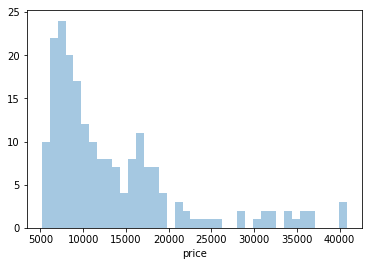

In [308]:
# single variable analysis - price
sns.distplot(new_car_df.price, kde=False, bins = 39)

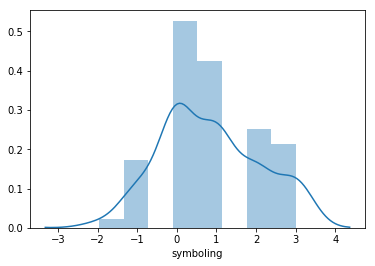

In [309]:
# dist plot for symboling
sns.distplot(new_car_df.symboling)

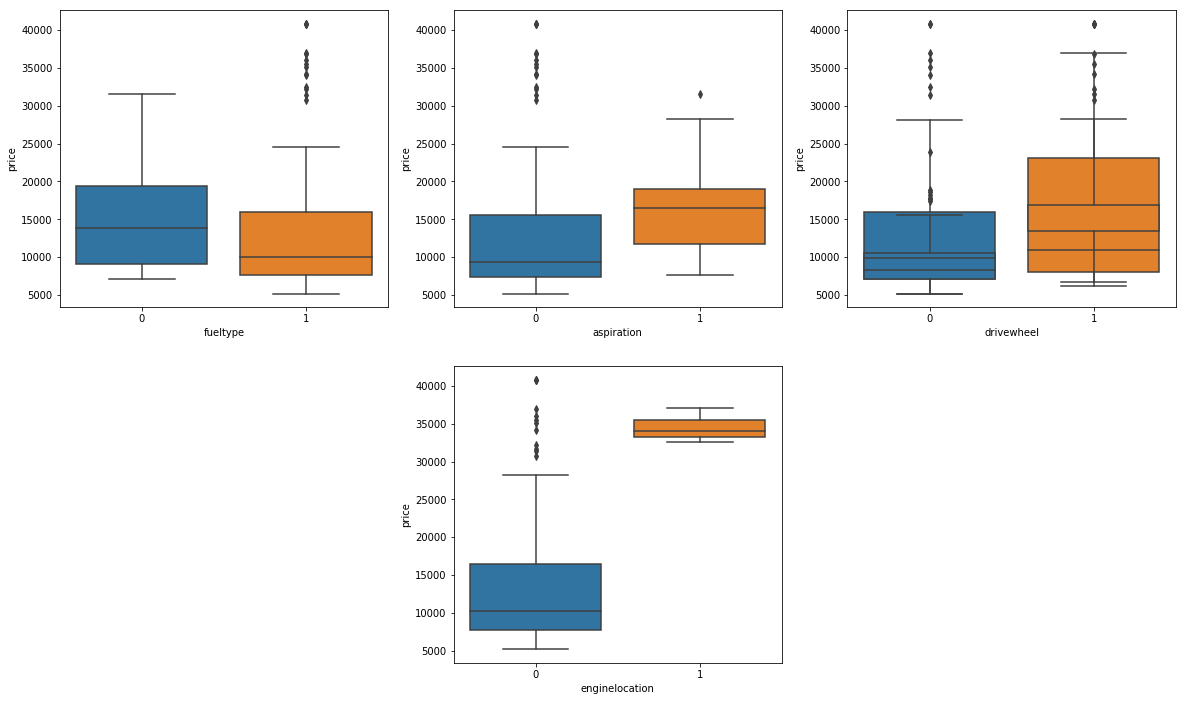

In [311]:
#box plot for categorical data
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = new_car_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = new_car_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = new_car_df)
plt.subplot(2,3,3)

sns.boxplot(x = 'drivewheel', y = 'price', data = new_car_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = new_car_df)
plt.show()

In [312]:
# original data frame correlation matrix after encoding and dummies are being done
#correaltion matrix - this useful to know how much columns are dependent on each other, easier to know data more precisely
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr=new_car_df.corr()
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

##  Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [313]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_car_train, df_car_test = train_test_split(new_car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling the Features

In [188]:
# importing scaling libraries from sklearn
from sklearn.preprocessing import MinMaxScaler

In [305]:
scaler = MinMaxScaler()

In [314]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight','price','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

df_car_train[num_vars] = scaler.fit_transform(df_car_train[num_vars])

In [191]:
# checking train data set
df_car_train.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,carCompany_PEUGEOT,carCompany_PLYMOUTH,carCompany_PORCSHCE,carCompany_PORSCHE,carCompany_RENAULT,carCompany_SAAB,carCompany_SUBARU,carCompany_TOYOTA,carCompany_VOLKSWAGEN,carCompany_VOLVO
122,1.0,1,0,1,0,0,0.195018,0.389914,0.137931,0.192293,...,0,1,0,0,0,0,0,0,0,0
125,3.0,1,0,0,1,0,0.224499,0.417661,0.628983,0.133904,...,0,0,0,1,0,0,0,0,0,0
166,1.0,1,0,0,1,0,0.224499,0.414193,0.159756,0.367458,...,0,0,0,0,0,0,0,1,0,0
1,3.0,1,0,0,1,0,0.007075,0.415927,0.170668,0.000000,...,0,0,0,0,0,0,0,0,0,0
199,-1.0,1,1,1,1,0,0.585643,0.762764,0.508948,0.844297,...,0,0,0,0,0,0,0,0,0,1


In [192]:
df_car_train.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,carCompany_PEUGEOT,carCompany_PLYMOUTH,carCompany_PORCSHCE,carCompany_PORSCHE,carCompany_RENAULT,carCompany_SAAB,carCompany_SUBARU,carCompany_TOYOTA,carCompany_VOLKSWAGEN,carCompany_VOLVO
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797762,0.909091,0.181818,0.559441,0.349650,0.006993,0.373194,0.496438,0.362336,0.460806,...,0.055944,0.027972,0.0,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.194690,0.288490,0.387050,0.498199,0.478536,0.083624,0.218746,0.217246,0.235893,0.235259,...,0.230621,0.165472,0.0,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.224499,0.361300,0.154299,0.289607,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.298202,0.471421,0.312527,0.474504,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.471403,0.650042,0.476211,0.635072,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
#correaltion matrix for train data set - this useful to know how much columns are dependent on each other, easier to know data more precisely
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr=df_car_train.corr()
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
##Dividing df_car_train  into X and Y sets for the model building

In [194]:
y_train = df_car_train.pop('price')
X_train = df_car_train

### Building model using statsmodel, for the detailed statistics

# RFE

In [195]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [196]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [197]:
# RFE ranking support and un-support for all train set columns 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 43),
 ('fueltype', False, 18),
 ('aspiration', False, 13),
 ('doornumber', False, 41),
 ('drivewheel', False, 34),
 ('enginelocation', True, 1),
 ('wheelbase', False, 6),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 5),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 20),
 ('horsepower', False, 33),
 ('peakrpm', False, 12),
 ('citympg', False, 17),
 ('highwaympg', False, 14),
 ('fuelsystem_2bbl', False, 35),
 ('fuelsystem_4bbl', False, 25),
 ('fuelsystem_idi', False, 19),
 ('fuelsystem_mfi', False, 36),
 ('fuelsystem_mpfi', False, 26),
 ('fuelsystem_spdi', False, 16),
 ('fuelsystem_spfi', False, 37),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 11),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', True, 1),
 ('carbody_hardtop', False, 22),
 ('carbody_hatchba

In [198]:
# adding rfe support columns into variable
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'enginetype_ohcf', 'enginetype_rotor', 'carCompany_BMW',
       'carCompany_PEUGEOT', 'carCompany_PORSCHE', 'carCompany_SAAB',
       'carCompany_SUBARU', 'carCompany_VOLVO'],
      dtype='object')

In [199]:
# rfe rejected columns list
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'wheelbase', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'cylindernumber_six',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcv', 'carCompany_AUDI', 'carCompany_BUICK',
       'carCompany_CHEVROLET', 'carCompany_DODGE', 'carCompany_HONDA',
       'carCompany_ISUZU', 'carCompany_JAGUAR', 'carCompany_MAZDA',
       'carCompany_MERCURY', 'carCompany_MITSUBISHI', 'carCompany_NISSAN',
       'carCompany_PLYMOUTH', 'carCompany_PORCSHCE', 'carCompany_RENAULT',
       'carCompany_TOYOTA', 'carCompany_VOLKSWAGEN'],
      dtype='object')

In [200]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [201]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [202]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [203]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     127.4
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           6.73e-71
Time:                        20:32:36   Log-Likelihood:                 227.18
No. Observations:                 143   AIC:                            -416.4
Df Residuals:                     124   BIC:                            -360.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

carlength is insignificant in presence of other variables; can be dropped

We will iterate this process until we get the desired model for our data. We will drop the columns on the basis of following rules-
- high VIF & high p-value
- low VIF & high p-value
- high VIF & low p-value
- low VIF & low p-value

Also will observe R-squared and adj R-squared. 


In [238]:
# dropping carlength
X_train_new = X_train_rfe.drop(['carlength'], axis = 1)

In [107]:
#Rebuilding the model without carlength

In [239]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     132.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.13e-71
Time:                        20:48:58   Log-Likelihood:                 225.65
No. Observations:                 143   AIC:                            -415.3
Df Residuals:                     125   BIC:                            -362.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

In [ ]:
# dropping carCompany_PEUGEOT colun because of higher p-value i.e 0.05

In [240]:
X_train_new = X_train_new.drop(['carCompany_PEUGEOT'], axis=1)

In [241]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           5.81e-72
Time:                        20:49:13   Log-Likelihood:                 224.28
No. Observations:                 143   AIC:                            -414.6
Df Residuals:                     126   BIC:                            -364.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

In [ ]:
# dropping carCompany_SUBARU column because of higher p-value i.e 0.05

In [242]:
X_train_new = X_train_new.drop(['carCompany_SUBARU'], axis=1)

In [243]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           5.81e-72
Time:                        20:49:31   Log-Likelihood:                 224.28
No. Observations:                 143   AIC:                            -414.6
Df Residuals:                     126   BIC:                            -364.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

In [ ]:
# checkiing into the columns we got from RFE

In [244]:
X_train_new.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'enginetype_ohcf', 'enginetype_rotor', 'carCompany_BMW',
       'carCompany_PORSCHE', 'carCompany_SAAB', 'carCompany_VOLVO'],
      dtype='object')

In [ ]:
# we will iterate VIF  process for each column, to see and remove highly collinear columns so that our desired model does not over fit

In [276]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.10
2,carwidth,1.59
3,boreratio,1.59
1,enginelocation,1.04
4,cylindernumber_twelve,1.04
5,carCompany_BMW,1.02


In [ ]:
# dropping carCompany_SUBARU colun because of higher VIF , SORRY Adding comments later so could not mention value for VIF

In [246]:
X_train_new = X_train_new.drop(['cylindernumber_two'], axis=1)

In [247]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           5.81e-72
Time:                        20:50:00   Log-Likelihood:                 224.28
No. Observations:                 143   AIC:                            -414.6
Df Residuals:                     126   BIC:                            -364.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

In [ ]:
# dropping enginesize cz of high VIF. Here VIF is being compared with the benchmark value of 5, anything greator than 5 is dropped.

In [248]:
X_train_new = X_train_new.drop(['enginesize'], axis=1)

In [249]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     73.32
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           5.72e-55
Time:                        20:50:30   Log-Likelihood:                 176.99
No. Observations:                 143   AIC:                            -322.0
Df Residuals:                     127   BIC:                            -274.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

In [ ]:
# dropping curbweight cz of high VIF. Here VIF is being compared with the benchmark value of 5, anything greator than 5 is dropped.

In [251]:
X_train_new = X_train_new.drop(['curbweight'], axis=1)

In [252]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     63.62
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.32e-50
Time:                        20:52:18   Log-Likelihood:                 163.14
No. Observations:                 143   AIC:                            -296.3
Df Residuals:                     128   BIC:                            -251.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [258]:
X_train_new = X_train_new.drop(['stroke'], axis=1)

In [259]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     73.43
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           7.62e-52
Time:                        21:10:55   Log-Likelihood:                 161.50
No. Observations:                 143   AIC:                            -297.0
Df Residuals:                     130   BIC:                            -258.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [256]:

X_train_new = X_train_new.drop(['cylindernumber_five'], axis=1)

In [260]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     73.43
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           7.62e-52
Time:                        21:11:18   Log-Likelihood:                 161.50
No. Observations:                 143   AIC:                            -297.0
Df Residuals:                     130   BIC:                            -258.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [261]:

X_train_new = X_train_new.drop(['carCompany_VOLVO'], axis=1)

In [262]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     80.54
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           9.39e-53
Time:                        21:12:09   Log-Likelihood:                 161.36
No. Observations:                 143   AIC:                            -298.7
Df Residuals:                     131   BIC:                            -263.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [263]:
X_train_new = X_train_new.drop(['carCompany_SAAB'], axis=1)

In [264]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     88.66
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.43e-53
Time:                        21:13:13   Log-Likelihood:                 160.93
No. Observations:                 143   AIC:                            -299.9
Df Residuals:                     132   BIC:                            -267.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [266]:

X_train_new = X_train_new.drop(['carCompany_PORSCHE'], axis=1)

In [267]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     97.94
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           3.00e-54
Time:                        21:17:26   Log-Likelihood:                 160.10
No. Observations:                 143   AIC:                            -300.2
Df Residuals:                     133   BIC:                            -270.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [268]:


X_train_new = X_train_new.drop(['cylindernumber_three'], axis=1)

In [269]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           6.40e-55
Time:                        21:18:32   Log-Likelihood:                 159.19
No. Observations:                 143   AIC:                            -300.4
Df Residuals:                     134   BIC:                            -273.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

In [270]:

X_train_new = X_train_new.drop(['enginetype_rotor'], axis=1)

In [271]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           6.81e-55
Time:                        21:19:25   Log-Likelihood:                 156.51
No. Observations:                 143   AIC:                            -297.0
Df Residuals:                     135   BIC:                            -273.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [272]:


X_train_new = X_train_new.drop(['enginetype_ohcf'], axis=1)

In [273]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     132.6
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.62e-54
Time:                        21:20:32   Log-Likelihood:                 152.42
No. Observations:                 143   AIC:                            -290.8
Df Residuals:                     136   BIC:                            -270.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

In [274]:
X_train_new = X_train_new.drop(['cylindernumber_four'], axis=1)

In [275]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     126.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.24e-49
Time:                        21:21:37   Log-Likelihood:                 138.42
No. Observations:                 143   AIC:                            -264.8
Df Residuals:                     137   BIC:                            -247.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [277]:

X_train_new = X_train_new.drop(['boreratio'], axis=1)

In [295]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     159.6
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           9.94e-51
Time:                        23:32:59   Log-Likelihood:                 138.34
No. Observations:                 143   AIC:                            -266.7
Df Residuals:                     138   BIC:                            -251.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [ ]:
# This is the model i will select because of following factors-
#1- R-sqaured and Adj R-squared are pretty good, not too high so chance of collinearity is taken care and  they are 
#  highly similar with a negligible difference between them
#2- p-value is less than .05 which makes them highly significant.
#3- VIF also a major factor the values are way less than 5 which shows that the columns are not that collinear.
##NOTE- Will remove const in next step
#There may be other variables / model which can work better but given figures shows that this model can predict better results for Geely Auto


In [279]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.44
2,carwidth,1.04
3,cylindernumber_twelve,1.04
4,carCompany_BMW,1.01
1,enginelocation,1.00


In [287]:
# dropping const as it will cause issue while running test data
X_train_new = X_train_new.drop(['const'], axis=1)

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [280]:
y_train_price = lm.predict(X_train_lm)

In [281]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

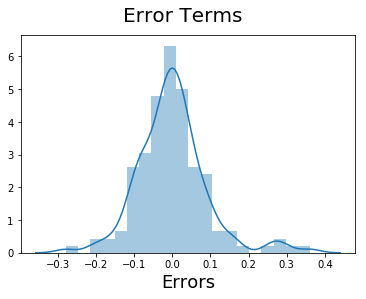

In [282]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [283]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight','price','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

df_car_test[num_vars] = scaler.transform(df_car_test[num_vars])

In [294]:
df_car_test.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,carCompany_PEUGEOT,carCompany_PLYMOUTH,carCompany_PORCSHCE,carCompany_PORSCHE,carCompany_RENAULT,carCompany_SAAB,carCompany_SUBARU,carCompany_TOYOTA,carCompany_VOLKSWAGEN,carCompany_VOLVO
count,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.92000,0.887097,0.177419,0.564516,0.419355,0.032258,0.399098,0.530745,0.384576,0.513586,...,0.048387,0.048387,0.016129,0.016129,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,1.35722,0.319058,0.385142,0.499868,0.497482,0.178127,0.215131,0.198296,0.214953,0.232378,...,0.216335,0.216335,0.127000,0.127000,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,-1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056053,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.268721,0.425465,0.225229,0.323667,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.347951,0.519978,0.334352,0.547489,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.00000,1.000000,0.000000,1.000000,1.000000,0.000000,0.543264,0.703368,0.432562,0.669132,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [284]:
y_test = df_car_test.pop('price')
X_test = df_car_test

In [290]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [291]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

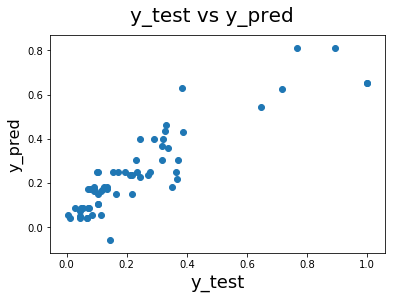

In [292]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
# R2 score for target test variable & target predicted variable score is approx 80% which is pretty good.

In [297]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7962173925857439


We can see that the equation of our best fitted line is:

$ price = 0.6769  \times  enginelocation + 0.7128  \times  carwidth + 0.2968 \times cylindernumber_twelve + 0.3428 \times carCompany_BMW  $
